<a href="https://colab.research.google.com/github/satyasaran/Deep-learning/blob/master/Hybrid_physics_model_Deep_Learning_Prediction_NanofluidViscosity_of_Extended_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.4

     |████████████████████████████████| 41.2MB 99kB/s 
     |████████████████████████████████| 1.7MB 40.5MB/s 
     |████████████████████████████████| 890kB 43.6MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=540fc3dc270b4bd750a761c945c784d83e536365741fdef3211d40e5c57d108e
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
pip install keras==2.1.5

# New Section

In [ ]:
#Python Code using Keras and Tensorflow  for Predicion of Nanofluid Viscosity prediction with 98% accuracy
#Same Dataset of the paper "Prediction of Viscosity of Water Based Al2O3, TiO2, SiO2 and CuO Nanofluids
#using a Reliable Approach"
#is used in this work
# Dataset Size: 
# No of data is being used to train the model is 594 and rest for testing.
#Written by Dr. Satyasaran Changdar
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import tensorflow as tf
#from tensorflow import set_random_seed()
#tf.random.set_seed
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/HYBRID PHYSICS MODEL/largedata_ext.csv')
X = data.iloc[:,1:6]
y = data.iloc[:,7]

In [ ]:
X

,d,phi,temp,baseVis,rho
0,47,1.000000,70.009860,0.403836,3.7
1,36,1.000000,70.000000,0.403890,3.7
2,47,1.000000,68.002960,0.415213,3.7
3,47,1.000000,67.026630,0.420933,3.7
4,43,0.010000,60.000000,0.466400,3.7
...,...,...,...,...,...
9987,45,1.370039,39.427050,1.340590,2.0
9988,77,2.022379,44.025772,1.225891,2.0
9989,51,2.060721,35.533099,1.186440,2.0
9990,32,0.434149,29.804753,0.636756,2.0


In [ ]:
#Preprocess data and split the data set for training and testing
ss = MinMaxScaler()
#data = pd.read_csv('NanoViscoDataAL2O3.csv')
#data = pd.read_csv('largedata_extended.csv')
data = pd.read_csv('/content/drive/My Drive/HYBRID PHYSICS MODEL/largedata_ext.csv')
data = pd.read_csv('largedata.csv')
#data = pd.read_csv('largedata.csv')
X = data.iloc[1:791,1:6]
y = data.iloc[1:791:,7]


In [ ]:
X

,d,phi,temp,baseVis,nanoVis
1,47,1.00000,70.009860,0.403836,0.431218
2,36,1.00000,70.000000,0.403890,0.440625
3,47,1.00000,68.002960,0.415213,0.446655
4,47,1.00000,67.026630,0.420933,0.462093
5,43,0.00000,60.000000,0.466400,0.466903
...,...,...,...,...,...
786,47,9.40000,24.122290,0.908182,4.406346
787,29,9.00000,39.852188,0.654804,4.674795
788,47,12.07112,25.000000,0.890080,4.706210
789,47,9.40000,22.223870,0.949392,4.861750


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle = True, test_size=0.01, random_state = 123)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
scaler = MinMaxScaler().fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))
y_test  = scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
data.iloc[:,1:8]

In [ ]:
X

,d,phi,temp,baseVis,rho,mu_phy
0,47,1.000000,70.009860,0.403836,3.7,0.448198
1,36,1.000000,70.000000,0.403890,3.7,0.472773
2,47,1.000000,68.002960,0.415213,3.7,0.460166
3,47,1.000000,67.026630,0.420933,3.7,0.466177
4,43,0.010000,60.000000,0.466400,3.7,0.476483
...,...,...,...,...,...,...
9987,45,1.370039,39.427050,1.340590,2.0,1.444066
9988,77,2.022379,44.025772,1.225891,2.0,1.279783
9989,51,2.060721,35.533099,1.186440,2.0,1.279099
9990,32,0.434149,29.804753,0.636756,2.0,0.680293


In [ ]:
data.shape

(9992, 8)

In [ ]:
X_train.shape

(9892, 6)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
X_train_OLS = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_OLS)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        04:53:50   Log-Likelihood:                 17343.
No. Observations:                9892   AIC:                        -3.467e+04
Df Residuals:                    9885   BIC:                        -3.462e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0599      0.005    -11.057      0.0

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  
y_pred_Lin = regressor.predict(X_test) 
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test,y_pred_Lin))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test,y_pred_Lin))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred_Lin)))
print("R square (R^2):  Testing        %f" % sklearn.metrics.r2_score(y_test,y_pred_Lin))
print("R square (R^2):  Training       %f" % sklearn.metrics.r2_score(y_train,regressor.predict(X_train)))



Mean absolute error (MAE):      0.000722
Mean squared error (MSE):       0.000015
Root mean squared error (RMSE): 0.003852
R square (R^2):  Testing        -0.013826
R square (R^2):  Training       0.001918


In [ ]:
X_train.shape

(8493, 6)

In [ ]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
def ms(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))
# simple Keras sequential model
# Neural Network

np.random.seed(1337) 
# set the TF seed
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=24, activation='sigmoid', input_dim=X_train.shape[1]))
prediction_network.add(Dense(units=14, activation = 'sigmoid'))
prediction_network.add(Dense(units=1,activation = 'sigmoid'))
prediction_network.compile(optimizer='sgd', loss=ms, metrics=[ms,rmse,r_square])
#checkpoint_path='/content/drive/My Drive/HYBRID PHYSICS MODEL/checkpointWithoutPhysics1'
#mc = ModelCheckpoint(filepath=checkpoint_path, monitor='r_square', verbose=1, save_weights_only=True, save_best_only=True, mode='max')
#es = EarlyStopping(monitor='accuracy', patience=5, mode='max', verbose=0)
result=prediction_network.fit(X_train, y_train, batch_size=32, epochs=1000,validation_split=0.01)
# Predict the test set
#pd.DataFrame(result.history).to_csv("history.csv")
y_pred = prediction_network.predict(X_test)
#wl1=prediction_network.layers[0].get_weights()

Train on 774 samples, validate on 8 samples
Epoch 1/2000
774/774 [==============================] - 0s 375us/step - loss: 0.0576 - r_square: -1.4239 - val_loss: 0.0048 - val_r_square: 0.2285
Epoch 2/2000
774/774 [==============================] - 0s 42us/step - loss: 0.0280 - r_square: -0.0714 - val_loss: 0.0052 - val_r_square: 0.1681
Epoch 3/2000
774/774 [==============================] - 0s 38us/step - loss: 0.0278 - r_square: 0.0258 - val_loss: 0.0053 - val_r_square: 0.1442
Epoch 4/2000
774/774 [==============================] - 0s 42us/step - loss: 0.0278 - r_square: 0.0134 - val_loss: 0.0054 - val_r_square: 0.1325
Epoch 5/2000
774/774 [==============================] - 0s 38us/step - loss: 0.0278 - r_square: 0.0102 - val_loss: 0.0053 - val_r_square: 0.1486
Epoch 6/2000
774/774 [==============================] - 0s 38us/step - loss: 0.0278 - r_square: -0.0079 - val_loss: 0.0056 - val_r_square: 0.1052
Epoch 7/2000
774/774 [==============================] - 0s 39us/step - loss: 0.027

In [ ]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
def ms(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))
# simple Keras sequential model
# Neural Network

np.random.seed(1337) 
# set the TF seed
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=500, activation='relu', input_dim=6))
prediction_network.add(Dense(units=400, activation = 'relu'))
prediction_network.add(Dense(units=300, activation = 'relu'))
prediction_network.add(Dense(units=200, activation = 'relu'))
prediction_network.add(Dense(units=100, activation = 'relu'))
prediction_network.add(Dense(units=10, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'sigmoid'))
prediction_network.compile(optimizer='nadam', loss=ms, metrics=[ms,rmse,r_square])
checkpoint_path='/content/drive/My Drive/HYBRID PHYSICS MODEL/checkpointWithoutPhysics1'
mc = ModelCheckpoint(filepath=checkpoint_path, monitor='r_square', verbose=1, save_weights_only=True,
save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', patience=5, mode='max', verbose=0)
result=prediction_network.fit(X_train, y_train, batch_size=256, epochs=500,validation_split=0.01,callbacks=[mc])
# Predict the test set
pd.DataFrame(result.history).to_csv("history.csv")
y_pred = prediction_network.predict(X_test)
wl1=prediction_network.layers[0].get_weights()

In [ ]:
  first_layer_weights = prediction_network.layers[0].get_weights()[0]

In [ ]:
my_df = pd.DataFrame(first_layer_weights)
my_df.to_csv('my_csv.csv', index=True, header=True)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mscore=prediction_network.evaluate(X_test,y_test)
print("Mean Square Error : {:.6f}".format(mse))
print("Root Mean Square Error : {:.6f}".format(np.sqrt(mse)))
print("R^2= : {:.6f}".format(mscore[3]))
SS_res =  np.sum(np.square(y_test - y_pred)) 
SS_tot = np.sum(np.square(y_test - np.mean(y_test))) 
rs=(1 - SS_res/(SS_tot ))
AARD =  (np.sum(np.abs(y_test - y_pred)/y_test ))*100/y_test.shape[0]
print(rs)
print("AARD= : {:.6f}".format(AARD))

100/100 [==============================] - 0s 56us/step
Mean Square Error : 0.012782
Root Mean Square Error : 0.113057
R^2= : 0.029005
0.0638476186329594
AARD= : 197.776335


In [ ]:
#csv.writer(open('cities.csv','w'))

In [ ]:
prediction_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 500)               3500      
_________________________________________________________________
dense_86 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_87 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_88 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_89 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_90 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 11        
Total para

In [ ]:
# Loads the weights of MLP model
prediction_network.load_weights('/content/drive/My Drive/HYBRID PHYSICS MODEL/checkpointWithoutPhysics1')
# Re-evaluate the MLP model
acc = prediction_network.evaluate(X_test,y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc[3]))

100/100 [==============================] - 0s 161us/step
Restored model, accuracy: 99.85%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


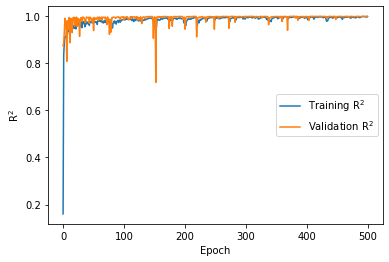

In [ ]:
# plot training curve for R^2 
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
#plt.title('Visualize R^2 history')
plt.ylabel('R$^2$')
plt.xlabel('Epoch')
plt.legend(['Training R$^2$','Validation R$^2$'], loc='center right')
plt.savefig("R_square.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


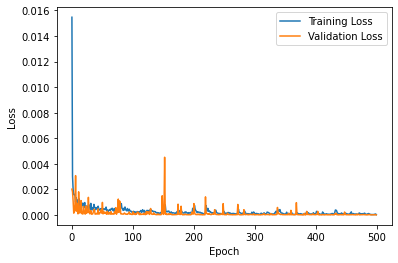

In [ ]:
# plot training curve for Loss 
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
#plt.title('Visualize loss history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper right')
plt.savefig("Visualizelosshistory.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


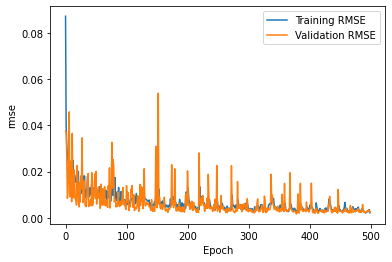

In [ ]:
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
#plt.title('Root mean square')
plt.ylabel('rmse')
plt.xlabel('Epoch')
plt.legend(['Training RMSE', 'Validation RMSE'], loc='upper right')
plt.savefig("RootMeanSquare.eps")
plt.show()

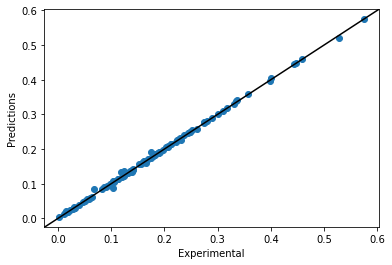

In [ ]:
test_predictions = prediction_network.predict(X_test).flatten()
plt.scatter(y_test, y_pred)
plt.xlabel('Experimental')
plt.ylabel('Predictions')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())


plt.plot([-10, 10],[-10,10],'k')

#plt.scatter(Xn,Yn,'r')

plt.savefig('TrueVsPredicted.eps')

True Vs Predicted On Training Data Set

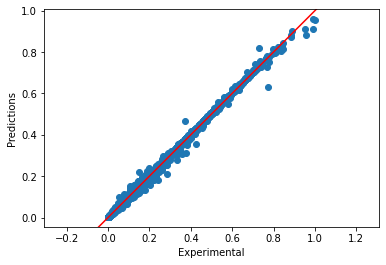

In [ ]:
y_train_pre= prediction_network.predict(X_train)
plt.scatter(y_train, y_train_pre)
plt.xlabel('Experimental')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-10, 10],[-10,10],'r')
plt.savefig('ExperimentalVsPredicted_On_TrainingData.eps')

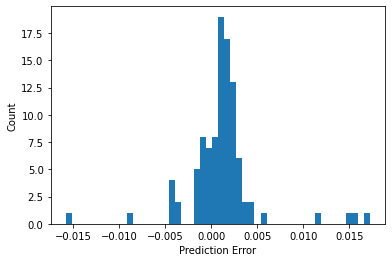

In [ ]:
error = y_pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.savefig('ErrorHistogram.eps')

Regression Line  Experimental Vs  Predicted 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




Mean absolute error (MAE):      0.002463
Mean squared error (MSE):       0.000016
Root mean squared error (RMSE): 0.004054
R square (R^2):                 0.998796


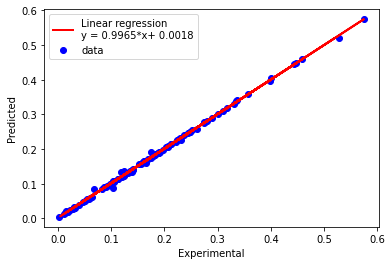

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_test.reshape(-1,1), y_pred)  
y_fit = regressor.predict(y_pred) 
reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_coef) + "*x+ " + str(reg_intercept)
plt.scatter(y_test, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
#plt.title('Linear Regression')
plt.legend()
plt.xlabel('Experimental')
plt.ylabel('Predicted')

plt.savefig('UsingLinearRegression.eps')

#-----------------------------------------------------------------------------
#-----------------------------------------------------------------------------
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_test,y_pred))

In [ ]:
y_train_pre= prediction_network.predict(X_train)
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_train.reshape(-1,1), y_train_pre)  
y_fit = regressor.predict(y_train_pre) 
reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_coef) + "*x+ " + str(reg_intercept)
plt.scatter(y_train, y_train_pre, color='blue', label= 'data')
plt.plot(y_train_pre, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
#plt.title('Linear Regression')
plt.legend()
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('UsingLinearRegression_Train.eps')
#-----------------------------------------------------------------------------
#-----------------------------------------------------------------------------
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_train,y_train_pre))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_train,y_train_pre))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_train,y_train_pre)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_train,y_train_pre))

`**Prediction of single data set**

In [ ]:
Xnew = np.array([[1,47,9.4,22.49507,0.943301]])
Xnew= ss.transform(Xnew)
ynew= prediction_network.predict(Xnew)
ynew = scaler.inverse_transform(ynew) 
Xnew = ss.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

**Prediction of Entire data set**

In [ ]:
data = pd.read_csv('/content/largedata_extended.csv')

In [ ]:
data = pd.read_csv('/content/largedata_extended.csv')
Xn = data.iloc[:,1:6]
Xn= ss.transform(Xn)
yn= prediction_network.predict(Xn)
yn = scaler.inverse_transform(yn) 
Xn = ss.inverse_transform(Xn)
print("X=%s" % (Xn[0:5,:]))
print("Predicted=%s" % (yn[0:5]))
np.savetxt('yp.csv', yn, delimiter=',', fmt='%s')

**Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Volume Concentration**
Nanoparticle Al2O3: size 43nm and Temerature  25 degree C




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


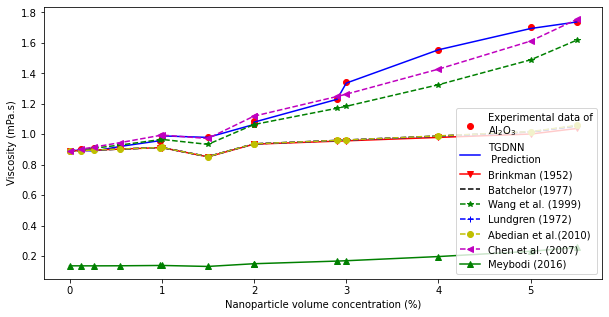

AARD (TGDNN): 0.368347
AARD (Brinkman): 16.144857
AARD (Batchelor): 15.875295
AARD (Wang): 4.421401
AARD (Lundgren): 15.871307
AARD (Abedian): 15.842526
AARD (Chen): 2.743002
AARD (Meybodi): 85.933353


In [ ]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=43
R=1
fT=25
S=43
def Brinkman(fBaseV,pPhi):
    pPhi=pPhi*.01
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1+2.5*pPhi+6.2*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):
    pPhi=pPhi*.01     
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Abedian(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1.0/(1-2.5*pPhi)),fBaseV))
def Lundgren(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi+pPhi*pPhi*pPhi+pPhi*pPhi*pPhi*pPhi),fBaseV))
def Chen(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1+10.6*pPhi+10.6*pPhi*10.6*pPhi),fBaseV))
def Meybodi(fBaseV,pPhi):
     Dn=0.91161630781+32.33014233*(np.log(S)/fT)- 11.732514460 *(np.power(np.log(S)/fT,2)) 
     Nm=133.54064976- 343.82413843*(np.exp(pPhi/S)) + 290.11804759*(np.power(np.exp(pPhi/S),2))-78.993120761*(np.power(np.exp(pPhi/S),3))
     return (np.multiply((Nm/Dn),fBaseV))
datag = pd.read_csv('VisVsPhi_dp_43nm_T25degreeC.csv')
phin= datag.iloc[:,0:1]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]
BaseVis=datag.iloc[:,1:2]
phin=phin.to_numpy()
nExpVis=ExpVis.to_numpy() # Converting to numpy array so that numpy features can be applied
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
#phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1)
plt.figure(figsize=(10,5)) 
plt.plot(phin,nExpVis,'ro',label='Experimental data of\nAl$_2$O$_3$')
plt.plot(phin,PredVis,'b',label='TGDNN \n Prediction')
plt.plot(phin, Brinkman(nBaseVis,phin),c='r',marker="v",ls='-',label='Brinkman (1952)')
plt.plot(phin, Bathelor(nBaseVis,phin),'--k',label='Batchelor (1977)')
plt.plot(phin, Wang(nBaseVis,phin),c='g',marker="*",ls='--',label='Wang et al. (1999)')
plt.plot(phin, Lundgren(nBaseVis,phin),c='b',marker="+",ls='--',label='Lundgren (1972)')
plt.plot(phin, Abedian(nBaseVis,phin),c='y',marker="o",ls='--',label='Abedian et al.(2010)')
plt.plot(phin, Chen(nBaseVis,phin),c='m',marker="<",ls='--',label='Chen et al. (2007)')
plt.plot(phin, Meybodi(nBaseVis,phin),c='g',marker="^",ls='-',label='Meybodi (2016)')
plt.xlabel('Nanoparticle volume concentration (%)')
plt.ylabel('Viscosity (mPa.s)')
plt.legend(loc='lower right')
plt.savefig('Comparison_Al2o3volume_concentration.eps')
plt.show()

def AARDCAL(Ev,Pv):
  SS_res =  np.sum(np.square(Ev -Pv)) 
  SS_tot = np.sum(np.square(Ev - np.mean(Ev))) 
  rs=(1 - SS_res/(SS_tot))
  AARD =  (np.sum(np.abs(Ev - Pv)/Ev ))*100/Ev.shape[0]
  return AARD
    
print("AARD (TGDNN): %f" % AARDCAL(nExpVis,nPredVis))
print("AARD (Brinkman): %f" % AARDCAL(nExpVis,Brinkman(nBaseVis,phin)))
print("AARD (Batchelor): %f" % AARDCAL(nExpVis,Bathelor(nBaseVis,phin)))
print("AARD (Wang): %f" % AARDCAL(nExpVis,Wang(nBaseVis,phin)))
print("AARD (Lundgren): %f" % AARDCAL(nExpVis,Lundgren(nBaseVis,phin)))
print("AARD (Abedian): %f" % AARDCAL(nExpVis,Abedian(nBaseVis,phin)))
print("AARD (Chen): %f" % AARDCAL(nExpVis,Chen(nBaseVis,phin)))
print("AARD (Meybodi): %f" % AARDCAL(nExpVis,Meybodi(nBaseVis,phin)))


**Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature]**
Nanoparticle Al2O3: size 47nm and volume Concentration 1 %

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


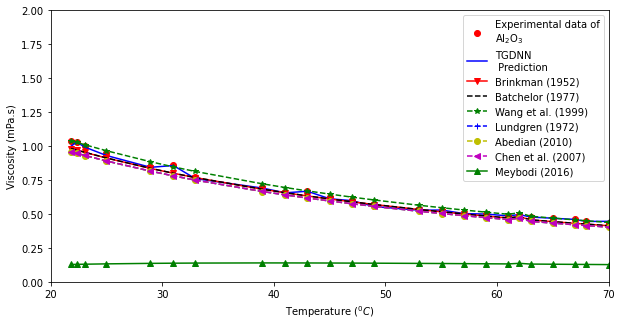

AARD (TGDNN): 0.971197
AARD (Brinkman): 3.459833
AARD (Batchelor): 3.416211
AARD (Wang): 2.830525
AARD (Lundgren): 5.511706
AARD (Abedian): 5.511706
AARD (Chen): 5.435090
AARD (Meybodi): 77.610188


In [ ]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=47
S=47
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
def Abedian(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1.0/(1-2.5*pPhi)),fBaseV))
def Lundgren(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi+pPhi*pPhi*pPhi+pPhi*pPhi*pPhi*pPhi),fBaseV))
def Chen(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1+10.6*pPhi+10.6*pPhi*10.6*pPhi),fBaseV))
def Meybodi(fBaseV,pPhi,fnT):
     Dn=0.91161630781+32.33014233*(np.log(S)/fnT)- 11.732514460 *(np.power(np.log(S)/fnT,2)) 
     Nm=133.54064976- 343.82413843*(np.exp(pPhi/S)) + 290.11804759*(np.power(np.exp(pPhi/S),2))-78.993120761*(np.power(np.exp(pPhi/S),3))
     return (np.multiply((Nm/Dn),fBaseV))
datag = pd.read_csv('VisVsTempfor_d47phi1.csv')
T = datag.iloc[:,0:1]
ExpVis=datag.iloc[:,1:2]
PredVis=datag.iloc[:,2:3]
BaseVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy() # Converting to numpy array so that numpy features can be applied
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1)
plt.figure(figsize=(10,5)) 
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')  
plt.plot(nT, Brinkman(nBaseVis,phin),c='r',marker="v",ls='-')
plt.plot(nT, Bathelor(nBaseVis,phin),'--k')
plt.plot(nT, Wang(nBaseVis,phin),c='g',marker="*",ls='--')
plt.plot(nT, Lundgren(nBaseVis,phin),c='b',marker="+",ls='--')
plt.plot(nT, Abedian(nBaseVis,phin),c='y',marker="o",ls='--')
plt.plot(nT, Chen(nBaseVis,phin),c='m',marker="<",ls='--')
plt.plot(nT, Meybodi(nBaseVis,phin,nT),c='g',marker="^",ls='-')
plt.ylim(0, 2)
plt.xlim(20, 70)
plt.legend(['Experimental data of\nAl$_2$O$_3$ ','TGDNN \n Prediction','Brinkman (1952)','Batchelor (1977)','Wang et al. (1999)','Lundgren (1972)','Abedian (2010)','Chen et al. (2007)','Meybodi (2016)'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_Al2o3_TemperatureConcentration1.eps')
plt.show()

def AARDCAL(Ev,Pv):
  SS_res =  np.sum(np.square(Ev -Pv)) 
  SS_tot = np.sum(np.square(Ev - np.mean(Ev))) 
  rs=(1 - SS_res/(SS_tot))
  AARD =  (np.sum(np.abs(Ev - Pv)/Ev ))*100/Ev.shape[0]
  return AARD
   
print("AARD (TGDNN): %f" % AARDCAL(nExpVis,nPredVis))
print("AARD (Brinkman): %f" % AARDCAL(nExpVis,Brinkman(nBaseVis,phin)))
print("AARD (Batchelor): %f" % AARDCAL(nExpVis,Bathelor(nBaseVis,phin)))
print("AARD (Wang): %f" % AARDCAL(nExpVis,Wang(nBaseVis,phin)))
print("AARD (Lundgren): %f" % AARDCAL(nExpVis,Lundgren(nBaseVis,phin)))
print("AARD (Abedian): %f" % AARDCAL(nExpVis,Abedian(nBaseVis,phin)))
print("AARD (Chen): %f" % AARDCAL(nExpVis,Chen(nBaseVis,phin)))
print("AARD (Meybodi): %f" % AARDCAL(nExpVis,Meybodi(nBaseVis,phin,nT)))

Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle TiO2: size 21nm and volume Concentration 1%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


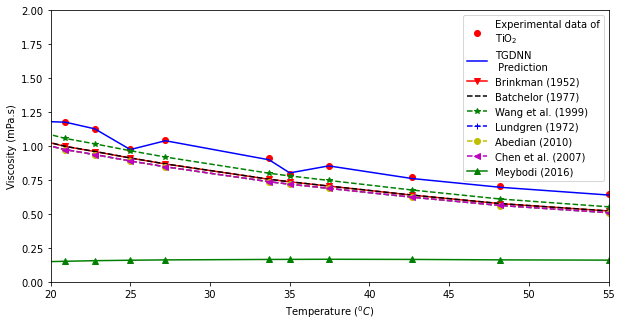

AARD (TGDNN): 0.792046
AARD (Brinkman): 14.462639
AARD (Batchelor): 14.410482
AARD (Wang): 9.787033
AARD (Lundgren): 16.528048
AARD (Abedian): 16.528048
AARD (Chen): 16.460364
AARD (Meybodi): 82.132688


In [ ]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=21
S=21
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
def Abedian(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1.0/(1-2.5*pPhi)),fBaseV))
def Lundgren(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi+pPhi*pPhi*pPhi+pPhi*pPhi*pPhi*pPhi),fBaseV))
def Chen(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1+10.6*pPhi+10.6*pPhi*10.6*pPhi),fBaseV))
def Meybodi(fBaseV,pPhi,fnT):
     Dn=0.91161630781+32.33014233*(np.log(S)/fnT)- 11.732514460 *(np.power(np.log(S)/fnT,2)) 
     Nm=133.54064976- 343.82413843*(np.exp(pPhi/S)) + 290.11804759*(np.power(np.exp(pPhi/S),2))-78.993120761*(np.power(np.exp(pPhi/S),3))
     return (np.multiply((Nm/Dn),fBaseV))
datag = pd.read_csv('VisVsTempfor_d21phi1_TIO2.csv')
T = datag.iloc[:,0:1]
BaseVis=datag.iloc[:,1:2]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy() # Converting to numpy array so that numpy features can be applied
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1)
plt.figure(figsize=(10,5)) 
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')  
plt.plot(nT, Brinkman(nBaseVis,phin),c='r',marker="v",ls='-')
plt.plot(nT, Bathelor(nBaseVis,phin),'--k')
plt.plot(nT, Wang(nBaseVis,phin),c='g',marker="*",ls='--')
plt.plot(nT, Lundgren(nBaseVis,phin),c='b',marker="+",ls='--')
plt.plot(nT, Abedian(nBaseVis,phin),c='y',marker="o",ls='--')
plt.plot(nT, Chen(nBaseVis,phin),c='m',marker="<",ls='--')
plt.plot(nT, Meybodi(nBaseVis,phin,nT),c='g',marker="^",ls='-')
plt.ylim(0, 2)
plt.xlim(20, 55)
plt.legend(['Experimental data of\nTiO$_2$ ','TGDNN \n Prediction','Brinkman (1952)','Batchelor (1977)','Wang et al. (1999)','Lundgren (1972)','Abedian (2010)','Chen et al. (2007)','Meybodi (2016)'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_TiO2_TemperatureConcentration1size21nm.eps')
plt.show()


def AARDCAL(Ev,Pv):
  SS_res =  np.sum(np.square(Ev -Pv)) 
  SS_tot = np.sum(np.square(Ev - np.mean(Ev))) 
  rs=(1 - SS_res/(SS_tot))
  AARD =  (np.sum(np.abs(Ev - Pv)/Ev ))*100/Ev.shape[0]
  return AARD
    
print("AARD (TGDNN): %f" % AARDCAL(nExpVis,nPredVis))
print("AARD (Brinkman): %f" % AARDCAL(nExpVis,Brinkman(nBaseVis,phin)))
print("AARD (Batchelor): %f" % AARDCAL(nExpVis,Bathelor(nBaseVis,phin)))
print("AARD (Wang): %f" % AARDCAL(nExpVis,Wang(nBaseVis,phin)))
print("AARD (Lundgren): %f" % AARDCAL(nExpVis,Lundgren(nBaseVis,phin)))
print("AARD (Abedian): %f" % AARDCAL(nExpVis,Abedian(nBaseVis,phin)))
print("AARD (Chen): %f" % AARDCAL(nExpVis,Chen(nBaseVis,phin)))
print("AARD (Meybodi): %f" % AARDCAL(nExpVis,Meybodi(nBaseVis,phin,nT)))



Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle SiO2: size 12nm and volume Concentration 4%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


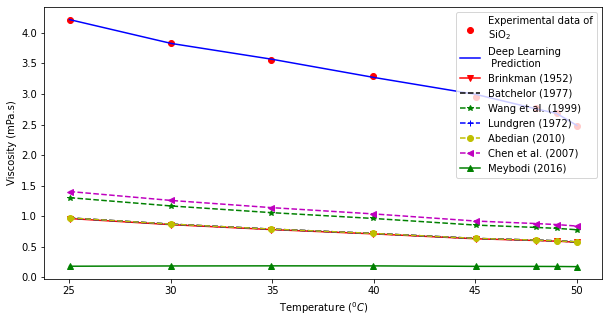

AARD (TGDNN): 0.440705
AARD (Brinkman): 77.791815
AARD (Batchelor): 77.589922
AARD (Wang): 69.942231
AARD (Lundgren): 77.588578
AARD (Abedian): 77.567490
AARD (Chen): 67.620951
AARD (Meybodi): 94.141990


In [ ]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=12
S=12
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
def Abedian(fBaseV,pPhi):  
    return (np.multiply((1.0/(1-2.5*pPhi)),fBaseV))
def Lundgren(fBaseV,pPhi):  
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi+pPhi*pPhi*pPhi+pPhi*pPhi*pPhi*pPhi),fBaseV))
def Chen(fBaseV,pPhi):   
    return (np.multiply((1+10.6*pPhi+10.6*pPhi*10.6*pPhi),fBaseV))
def Meybodi(fBaseV,pPhi,fnT):
     Dn=0.91161630781+32.33014233*(np.log(S)/fnT)- 11.732514460 *(np.power(np.log(S)/fnT,2)) 
     Nm=133.54064976- 343.82413843*(np.exp(pPhi/S)) + 290.11804759*(np.power(np.exp(pPhi/S),2))-78.993120761*(np.power(np.exp(pPhi/S),3))
     return (np.multiply((Nm/Dn),fBaseV))
datag = pd.read_csv('VisVsTempfor_d12phi4SiO2.csv')
T = datag.iloc[:,0:1]
BaseVis=datag.iloc[:,1:2]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy() # Converting to numpy array so that numpy features can be applied
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
phin=0.04*np.ones(np.size(nBaseVis)).reshape(-1,1)
plt.figure(figsize=(10,5)) 
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')  
plt.plot(nT, Brinkman(nBaseVis,phin),c='r',marker="v",ls='-')
plt.plot(nT, Bathelor(nBaseVis,phin),'--k')
plt.plot(nT, Wang(nBaseVis,phin),c='g',marker="*",ls='--')
plt.plot(nT, Lundgren(nBaseVis,phin),c='b',marker="+",ls='--')
plt.plot(nT, Abedian(nBaseVis,phin),c='y',marker="o",ls='--')
plt.plot(nT, Chen(nBaseVis,phin),c='m',marker="<",ls='--')
plt.plot(nT, Meybodi(nBaseVis,phin,nT),c='g',marker="^",ls='-')
#plt.ylim(0, 2)
#plt.xlim(20, 55)
plt.legend(['Experimental data of\nSiO$_2$ ','Deep Learning \n Prediction','Brinkman (1952)','Batchelor (1977)','Wang et al. (1999)','Lundgren (1972)','Abedian (2010)','Chen et al. (2007)','Meybodi (2016)'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_SiO2_TemperatureConcentration1size21nm.eps')
plt.show()

def AARDCAL(Ev,Pv):
  SS_res =  np.sum(np.square(Ev -Pv)) 
  SS_tot = np.sum(np.square(Ev - np.mean(Ev))) 
  rs=(1 - SS_res/(SS_tot))
  AARD =  (np.sum(np.abs(Ev - Pv)/Ev ))*100/Ev.shape[0]
  return AARD
    
print("AARD (TGDNN): %f" % AARDCAL(nExpVis,nPredVis))
print("AARD (Brinkman): %f" % AARDCAL(nExpVis,Brinkman(nBaseVis,phin)))
print("AARD (Batchelor): %f" % AARDCAL(nExpVis,Bathelor(nBaseVis,phin)))
print("AARD (Wang): %f" % AARDCAL(nExpVis,Wang(nBaseVis,phin)))
print("AARD (Lundgren): %f" % AARDCAL(nExpVis,Lundgren(nBaseVis,phin)))
print("AARD (Abedian): %f" % AARDCAL(nExpVis,Abedian(nBaseVis,phin)))
print("AARD (Chen): %f" % AARDCAL(nExpVis,Chen(nBaseVis,phin)))
print("AARD (Meybodi): %f" % AARDCAL(nExpVis,Meybodi(nBaseVis,phin,nT)))


Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle CuO: size 29nm and volume Concentration 1%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


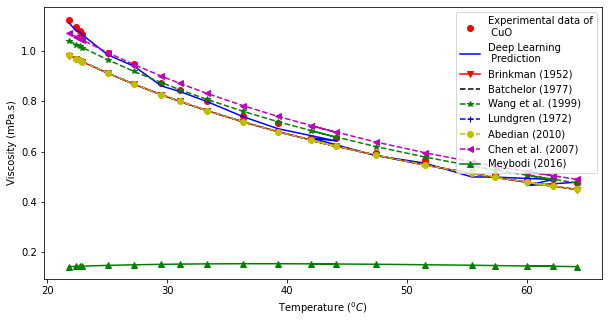

AARD (TGDNN): 1.394714
AARD (Brinkman): 5.708236
AARD (Batchelor): 5.650741
AARD (Wang): 2.937633
AARD (Lundgren): 5.650648
AARD (Abedian): 5.649267
AARD (Chen): 4.157205
AARD (Meybodi): 78.621134


In [ ]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=29
S=29
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
def Abedian(fBaseV,pPhi):  
    return (np.multiply((1.0/(1-2.5*pPhi)),fBaseV))
def Lundgren(fBaseV,pPhi):  
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi+pPhi*pPhi*pPhi+pPhi*pPhi*pPhi*pPhi),fBaseV))
def Chen(fBaseV,pPhi):   
    return (np.multiply((1+10.6*pPhi+10.6*pPhi*10.6*pPhi),fBaseV))
def Meybodi(fBaseV,pPhi,fnT):
     Dn=0.91161630781+32.33014233*(np.log(S)/fnT)- 11.732514460 *(np.power(np.log(S)/fnT,2)) 
     Nm=133.54064976- 343.82413843*(np.exp(pPhi/S)) + 290.11804759*(np.power(np.exp(pPhi/S),2))-78.993120761*(np.power(np.exp(pPhi/S),3))
     return (np.multiply((Nm/Dn),fBaseV))
datag = pd.read_csv('VisVsTempfor_d29phi1CuO.csv')
T = datag.iloc[:,0:1]
BaseVis=datag.iloc[:,1:2]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy() # Converting to numpy array so that numpy features can be applied
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1)
plt.figure(figsize=(10,5)) 
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')  
plt.plot(nT, Brinkman(nBaseVis,phin),c='r',marker="v",ls='-')
plt.plot(nT, Bathelor(nBaseVis,phin),'--k')
plt.plot(nT, Wang(nBaseVis,phin),c='g',marker="*",ls='--')
plt.plot(nT, Lundgren(nBaseVis,phin),c='b',marker="+",ls='--')
plt.plot(nT, Abedian(nBaseVis,phin),c='y',marker="o",ls='--')
plt.plot(nT, Chen(nBaseVis,phin),c='m',marker="<",ls='--')
plt.plot(nT, Meybodi(nBaseVis,phin,nT),c='g',marker="^",ls='-')
#plt.ylim(0, 2)
#plt.xlim(22, 55)
plt.legend(['Experimental data of\n CuO ','Deep Learning \n Prediction','Brinkman (1952)','Batchelor (1977)','Wang et al. (1999)','Lundgren (1972)','Abedian (2010)','Chen et al. (2007)','Meybodi (2016)'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_CuO_TemperatureConcentration1size29nm.eps')
plt.show()

def AARDCAL(Ev,Pv):
  SS_res =  np.sum(np.square(Ev -Pv)) 
  SS_tot = np.sum(np.square(Ev - np.mean(Ev))) 
  rs=(1 - SS_res/(SS_tot))
  AARD =  (np.sum(np.abs(Ev - Pv)/Ev ))*100/Ev.shape[0]
  return AARD
    
print("AARD (TGDNN): %f" % AARDCAL(nExpVis,nPredVis))
print("AARD (Brinkman): %f" % AARDCAL(nExpVis,Brinkman(nBaseVis,phin)))
print("AARD (Batchelor): %f" % AARDCAL(nExpVis,Bathelor(nBaseVis,phin)))
print("AARD (Wang): %f" % AARDCAL(nExpVis,Wang(nBaseVis,phin)))
print("AARD (Lundgren): %f" % AARDCAL(nExpVis,Lundgren(nBaseVis,phin)))
print("AARD (Abedian): %f" % AARDCAL(nExpVis,Abedian(nBaseVis,phin)))
print("AARD (Chen): %f" % AARDCAL(nExpVis,Chen(nBaseVis,phin)))
print("AARD (Meybodi): %f" % AARDCAL(nExpVis,Meybodi(nBaseVis,phin,nT)))

Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle CuO: size 29nm and volume Concentration 7%

In [ ]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
prediction_network.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_rmsprop=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [ ]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))
# Start a simple Keras sequential model
#-----------------------------------------------------------------------------
# set the seeds for reproducible results with TF (wont work with GPU, only CPU)
#np.random.seed(12345)
np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
prediction_network.compile(optimizer=optimizers.Nadam(lr=.001), loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_Nadam=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [ ]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.001)
prediction_network.compile(optimizer=sgd, loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_sgd=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [ ]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.001,momentum=0.9)
prediction_network.compile(optimizer=sgd, loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_sgdPlusMoment=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [ ]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.001,nesterov=True)
prediction_network.compile(optimizer=sgd, loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_sgdPlusNesterov=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [ ]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
#sgd = optimizers.SGD(lr=0.001)
prediction_network.compile(optimizer=sgd, loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_sgdPlusNesterovPlusMomentum=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


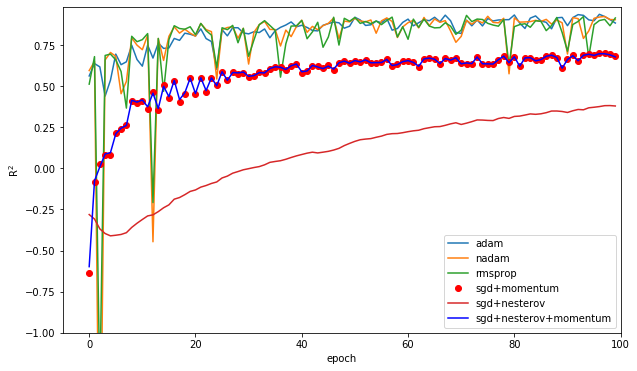

In [ ]:
plt.figure(figsize=(10, 5))  
plt.axis((-5,100,-1,0.983))

plt.plot(result_Adam.history['val_r_square'])
plt.plot(result_Nadam.history['val_r_square'])
plt.plot(result_rmsprop.history['val_r_square'])
#plt.plot(result_sgd.history['val_r_square'],'ko')
plt.plot(result_sgdPlusMoment.history['val_r_square'],'ro')
plt.plot(result_sgdPlusNesterov.history['val_r_square'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['val_r_square'],'b')
#plt.title('val_r_square')  
plt.ylabel('R$^2$')  
plt.xlabel('epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='lower right') 
plt.savefig('OptimizersComparison_R_square.eps') 
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


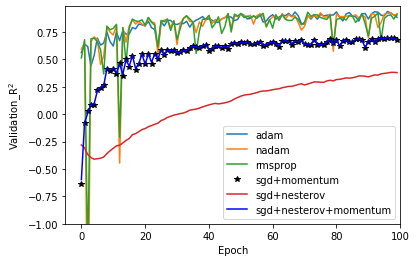

In [ ]:
#plt.figure(figsize=(10, 6))  
plt.axis((-5,100,-1,0.983))

plt.plot(result_Adam.history['val_r_square'])
plt.plot(result_Nadam.history['val_r_square'])
plt.plot(result_rmsprop.history['val_r_square'])
#plt.plot(result_sgd.history['val_r_square'])
plt.plot(result_sgdPlusMoment.history['val_r_square'],'k*')
plt.plot(result_sgdPlusNesterov.history['val_r_square'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['val_r_square'],'b')
#plt.title('val_r_square')  
plt.ylabel('Validation_R$^2$')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='lower right') 
plt.savefig('OptimizersComparison_Val_R_square.eps') 
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


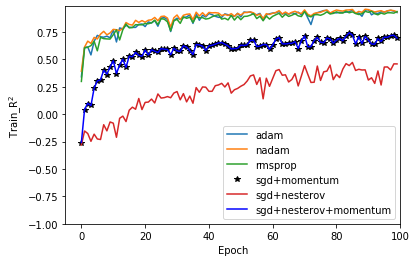

In [ ]:
#plt.figure(figsize=(10, 6))  
plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['r_square'])
plt.plot(result_Nadam.history['r_square'])
plt.plot(result_rmsprop.history['r_square'])
#plt.plot(result_sgd.history['r_square'])
plt.plot(result_sgdPlusMoment.history['r_square'],'k*')
plt.plot(result_sgdPlusNesterov.history['r_square'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['r_square'],'b')
#plt.title('val_r_square')  
plt.ylabel('Train_R$^2$')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='lower right') 
plt.savefig('OptimizersComparison_Train_R_square.eps') 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


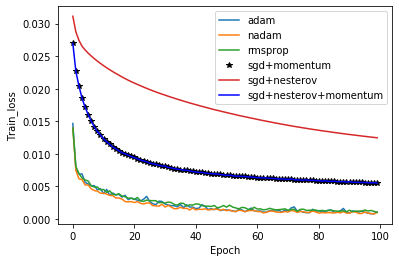

In [ ]:
#plt.figure(figsize=(10, 6))  
#plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['loss'])
plt.plot(result_Nadam.history['loss'])
plt.plot(result_rmsprop.history['loss'])
#plt.plot(result_sgd.history['loss'])
plt.plot(result_sgdPlusMoment.history['loss'],'k*')
plt.plot(result_sgdPlusNesterov.history['loss'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['loss'],'b')
#plt.title('val_r_square')  
plt.ylabel('Train_loss')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='top right') 
plt.savefig('OptimizersComparison_Train_loss.eps') 
plt.show()

In [ ]:
#plt.figure(figsize=(10, 6))  
#plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['val_loss'])
plt.plot(result_Nadam.history['val_loss'])
plt.plot(result_rmsprop.history['val_loss'])
#plt.plot(result_sgd.history['val_loss'])
plt.plot(result_sgdPlusMoment.history['val_loss'],'k*')
plt.plot(result_sgdPlusNesterov.history['val_loss'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['val_loss'],'b')
#plt.title('val_r_square')  
plt.ylabel('Validation_loss')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='top right') 
plt.savefig('OptimizersComparison_Validation_loss.eps') 
plt.show()

In [ ]:
#plt.figure(figsize=(10, 6))  
#plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['val_rmse'])
plt.plot(result_Nadam.history['val_rmse'])
plt.plot(result_rmsprop.history['val_rmse'])
#plt.plot(result_sgd.history['val_rmse'])
plt.plot(result_sgdPlusMoment.history['val_rmse'],'k*')
plt.plot(result_sgdPlusNesterov.history['val_rmse'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['val_rmse'],'b')
#plt.title('val_r_square')  
plt.ylabel('Validation_rmse')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='top right') 
plt.savefig('OptimizersComparison_Validation_rmse.eps') 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


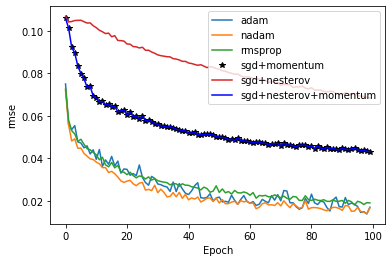

In [ ]:
#plt.figure(figsize=(10, 6))  
#plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['rmse'])
plt.plot(result_Nadam.history['rmse'])
plt.plot(result_rmsprop.history['rmse'])
#plt.plot(result_sgd.history['rmse'])
plt.plot(result_sgdPlusMoment.history['rmse'],'k*')
plt.plot(result_sgdPlusNesterov.history['rmse'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['rmse'],'b')
#plt.title('val_r_square')  
plt.ylabel('rmse')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='top right') 
plt.savefig('OptimizersComparison_Train_rmse.eps') 
plt.show()